#**Assignment 2** Root Finding

###Import 

In [1]:
import numpy as np # needed for mathematical operations
import matplotlib.pyplot as plt # needed for plotting graphs

####Error% function: 
$$error = |
\frac{𝑥_{𝑛𝑒𝑤}−𝑥_{𝑜𝑙𝑑}}{𝑥_{𝑛𝑒𝑤}}| * 100\%$$


###**Q1.** Newton-Raphson method using finite difference derivatives
a. Define python functions for the following finite difference methods for computing gradients of any function **f**

>i) Forward difference equation  
>$$f'(a) = \frac{f(a + h) - f(a)}{h}$$
>ii) Backward difference equation  
>$$f'(a) = \frac{f(a) - f(a - h)}{h}$$
>iii) Central difference equation  
>$$f'(a) = \frac{f(a + h) - f(a - h)}{2h}$$

b. Implement Newton-Raphson method in python to compute roots using the finite difference derivative functions. 

The function should print x, f(x), error calculated per iteration as shown below.

c. Use the newly defined Newton-Raphson function to calculate the roots for the following function:
$$𝑓(𝑥) = 𝑒^𝑥 − 3𝑥 $$
Compute roots using all 3 finite difference methods. Use initial guess of 1.

d. Plot the estimates per iteration for all 3 finite difference methods in a single subplot. 

Also plot the main function in another subplot. 

Example figure given below.

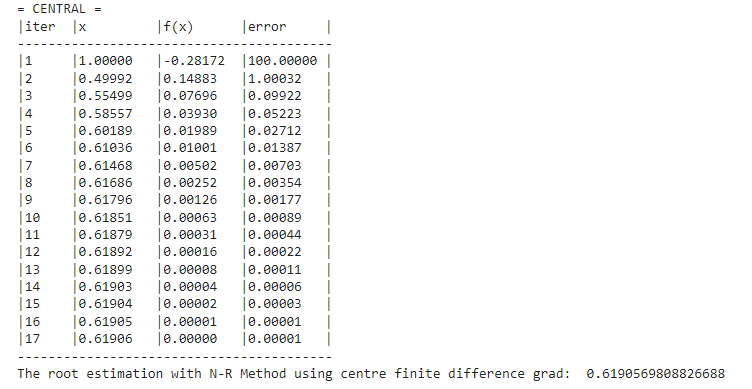

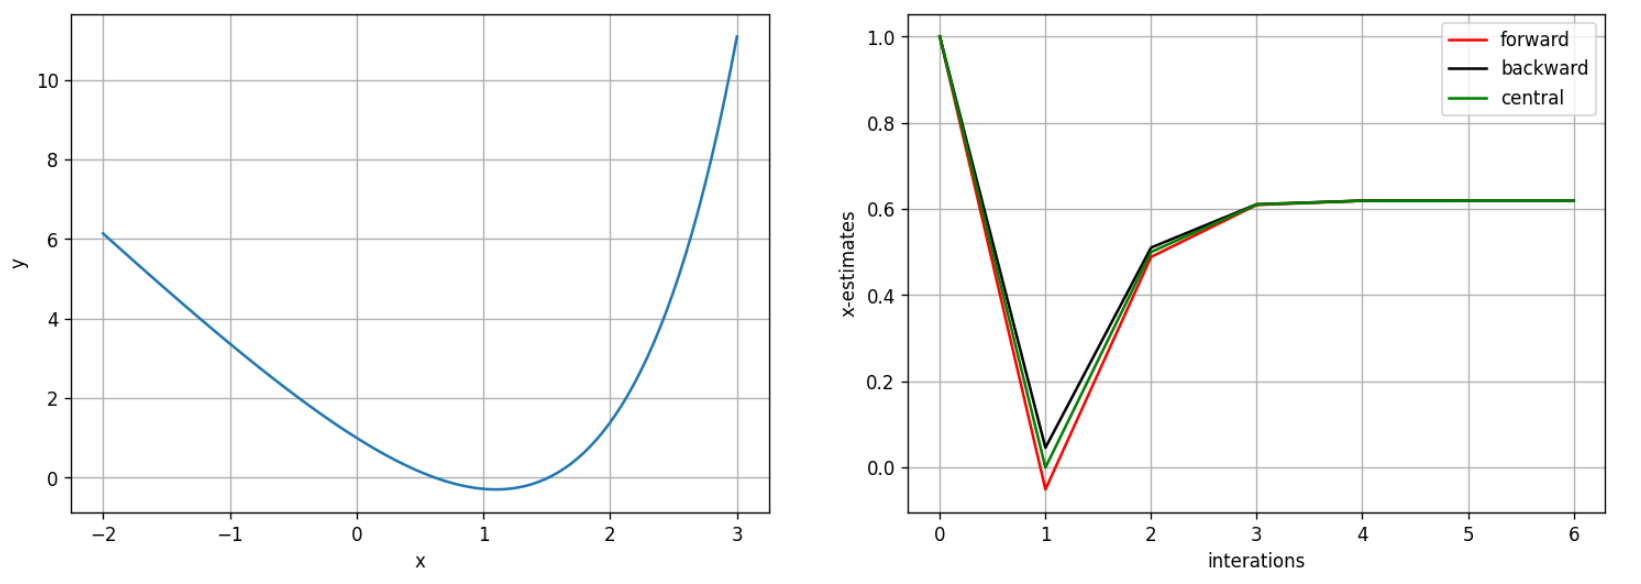

|iter|          x           |            f(x)            |               error             |
---------------------------------------------------------------------------------------------
| 1 |    1    |    -0.2817181715409549    |     100    |
| 2 |    -0.0004826959816535137    |    1.0009655084422704    |     207269.73789059112    |
| 3 |    0.4998918267380087    |    0.14886745257400658    |     100.09656008676984    |
| 4 |    0.6100518434079831    |    0.010371285266902452    |     18.05748443518807    |
| 5 |    0.6189973788958404    |    7.30387036163016e-05    |     1.4451653258716848    |
| 6 |    0.6190612886100838    |    -2.1417960738290276e-09    |     0.010323648953547938    |
---------------------------------------------------------------------------------------------
The root estimation with N-R Method using forward finite difference grad: 0.6190612867357927
|iter|          x           |            f(x)            |               error             |
---------------------

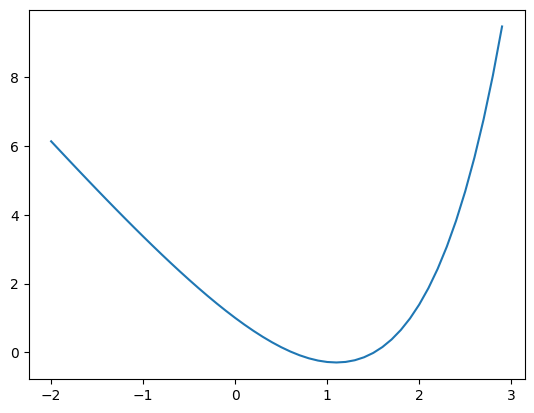

In [49]:
#code here
h=0.0001
def error(new,old):
    return np.absolute((new-old)/new*100)
def f(x):
    return np.exp(x)-3*x
def f_fd(x):
    return (f(x+h)-f(x))/h
def f_bd(x):
    return (f(x)-f(x-h))/h
def f_cd(x):
    return (f(x+h)-f(x-h))/(2*h)
x_fd_list=[]
def newRaph_fd(x):
    iter=1
    e=100
    print("|iter|          x           |            f(x)            |               error             |")
    print("---------------------------------------------------------------------------------------------")
    while(e>0.000001):
        print("|",iter,"|   ",x,"   |   ",f(x),"   |    ",e,"   |")
        x_fd_list.append(x)
        xold=x
        x=x-f(x)/f_fd(x)
        e=error(x,xold)
        iter=iter+1
    print("---------------------------------------------------------------------------------------------")
    print("The root estimation with N-R Method using forward finite difference grad:",x)
newRaph_fd(1)
x_bd_list=[]
def newRaph_bd(x):
    iter=1
    e=100
    print("|iter|          x           |            f(x)            |               error             |")
    print("---------------------------------------------------------------------------------------------")
    while(e>0.000001):
        print("|",iter,"|   ",x,"   |   ",f(x),"   |    ",e,"   |")
        x_bd_list.append(x)
        xold=x
        x=x-f(x)/f_bd(x)
        e=error(x,xold)
        iter=iter+1
    print("---------------------------------------------------------------------------------------------")
    print("The root estimation with N-R Method using backward finite difference grad:",x)
newRaph_bd(1)
x_cd_list=[]
def newRaph_cd(x):
    iter=1
    e=100
    print("|iter|          x           |            f(x)            |               error             |")
    print("---------------------------------------------------------------------------------------------")
    while(e>0.000001):
        print("|",iter,"|   ",x,"   |   ",f(x),"   |    ",e,"   |")
        x_cd_list.append(x)
        xold=x
        x=x-f(x)/f_cd(x)
        e=error(x,xold)
        iter=iter+1
    print("---------------------------------------------------------------------------------------------")
    print("The root estimation with N-R Method using center finite difference grad:",x)
newRaph_cd(1)
x=np.arange(-2,3,0.1)
plt.plot(x,f(x))
plt.show()



###**Q2.** Bisection Method to find roots
a. Define a function 
> $$y = e^x - 3x$$
such that, 
>$$ 0 < x < 2$$

b. Plot the function as shown in the figure given at the end

c. Define 
> $$f(x) = e^x - 3x$$ 
as a python function

c. Implement the **bisection method** to find the roots for any function **f**.
>The implementation should
1.   Estimate a **root**,**x_r** of function **f** using the **bisection method**
2.   Iterate until the error% < 0.001
3.   Return the best root estimate and a list of all previous estimates *(you can append older root estimates to another list initialized outside the update loop)*
4.   Print x_l |  f(x_l) | x_u | f(x_u) | x_r = (x_l + x_u)/2 | f(x_r) | error%|

Algorithm: https://www.youtube.com/watch?v=Y2AUhxoQ-OQ

The output should be similar to the figure below 
(output of the iterations does not need to be in table format)

d. Use the **Bisection** function to find all the roots for the function 
>$$e^x - 3x$$
You can use the plotted graph for 
>$$y = e^x - 3x$$ 
To select suitable upper and lower bounds to search for roots.

e. Plot the estimates array received on the same figure as shown in picture below.

```
****Hint**** 
def f(x):
  # return some math function

# x_l (lower bound) and x_u (upper bound) define the interval in which we want to find the root. 
# error is the percent error that is acceptable for the estimate
# x_r is the latest root estimate

def bisection(x_l, x_u, error, f):
  # finds the roots of function f using bisection method
  # in each iteration, if the error% > 0.001, x_u or x_l is updated based
  # on the value of product of f(x_l)*f(x_r)

  # returns the best root estimate, x_r 
  # and the list of all previous estimates, (x_r from previous iterations) 
  # prints  x_l,  f(x_l), x_u ,f(x_u), x_r = (x_l + x_u)/2, f(x_r), error%

# python allows you to return multiple values 
def func():
  return x, [2, 3]

# accessing multiple returns
x, x_arr = func()
```


**Iteration Printing:**

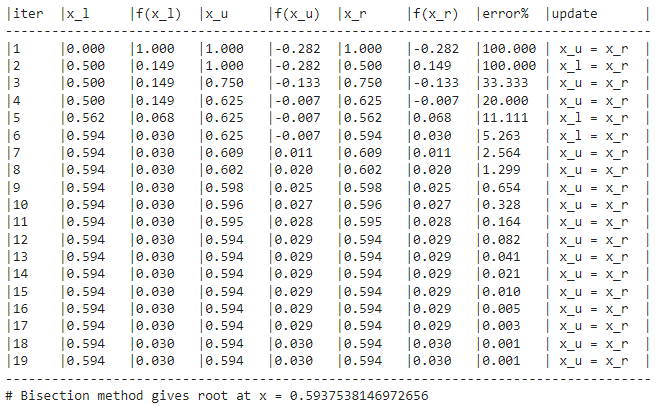

**Final Plot:**

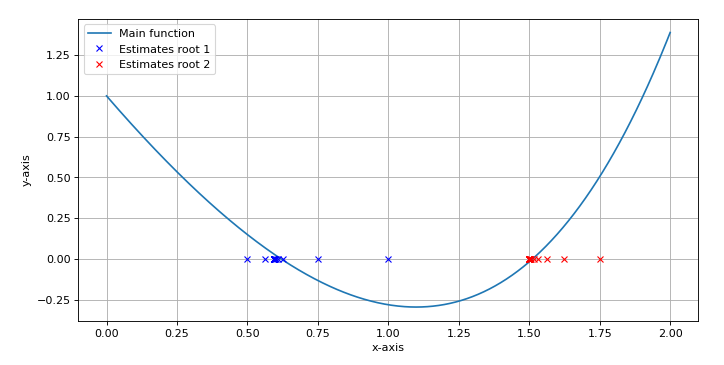


In [ ]:
# code here
from matplotlib.pyplot import figure

figure(figsize=(10, 5), dpi=80)

# Plot graph e^x - 3x

# define function f(x), for e^x - 3x using def

# define bisection function
# def bisection(x_l, x_u, error, f):
#   print("implement me")

# find the root and plot the estimates using the bisection function

plt.grid()
plt.show()

###**Submission Instructions:** 
Open the ipynb file in google colab and solve the problems. 
Download and submit the ipynb file with the appropriate name.
Name it according to the following format:

**your_id-labAssign2.ipynb**

(For example, if your id is 1770077 then the file name should be 1770077-labAssign1.ipynb)

Direct queries regarding the questions to: saminbinkarim@gmail.com